In [2]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### <center><b>EDA датасета с данными о дорожно-транспортных происшествиях в США</b>

В датасете представлена информация о 49 штатах. Данные собирались с февраля 2016 года по декабрь 2021. [Файл взят с Kaggle.](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)

[Информация о датасете](https://smoosavi.org/datasets/us_accidents) (на английском языке).

In [3]:
us_accidents = pd.read_csv('F:/Python/us accidents/US_Accidents_Dec21_updated.csv')
us_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
print('Количество строк в датасете:', us_accidents.shape[0])
print('Количество столбцов в датасете:', us_accidents.shape[1])

Количество строк в датасете: 2845342
Количество столбцов в датасете: 47


In [5]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
us_accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Поменяем формат столбцов со временем в формат datetime.

In [7]:
us_accidents.Start_Time = pd.to_datetime(us_accidents.Start_Time)
us_accidents.End_Time = pd.to_datetime(us_accidents.End_Time)

In [8]:
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


Считаем процент пропущенных значений и  оставляем только те столбцы, в которых присутствуют пропуски.

In [9]:
missing_percentages = (us_accidents.isna().sum().sort_values(ascending=False) / len(us_accidents)) * 100
missing_percentages = missing_percentages[missing_percentages != 0]

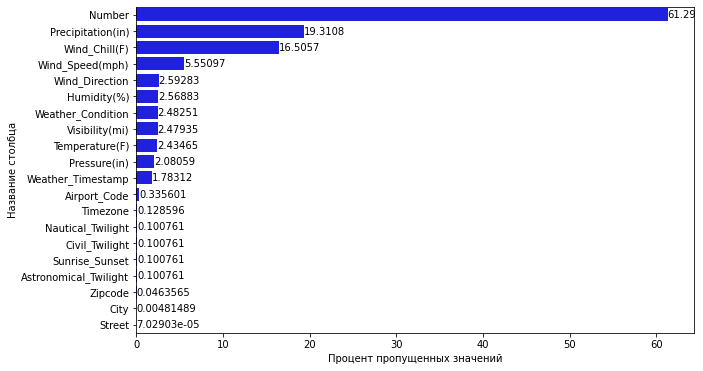

In [10]:
fig, ax =plt.subplots(figsize=(10,6))
ax = sns.barplot(
    y=missing_percentages.index,
    x=missing_percentages,
    color='blue'
)
plt.xlabel('Процент пропущенных значений')
plt.ylabel('Название столбца')
plt.bar_label(ax.containers[0])
plt.show()

In [11]:
print('Первая зафиксированная авария:', us_accidents.Start_Time.min())
print('Последняя зафиксированная авария:', us_accidents.Start_Time.max())

Первая зафиксированная авария: 2016-01-14 20:18:33
Последняя зафиксированная авария: 2021-12-31 23:30:00


В описании данных указано, что информация собиралась с ферваля 2016 года до декабря 2021 года. Тем не менее, в таблице присутствуют данные о проиcшествиях, произошедших ранее февраля 2016.

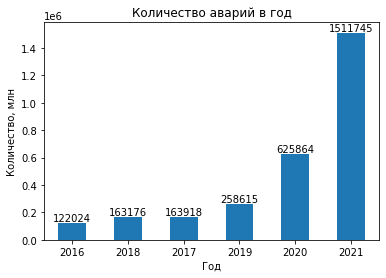

In [12]:
accidents_by_year = us_accidents.Start_Time.dt.year.value_counts().sort_values()

ax = accidents_by_year.plot.bar(rot=0)
ax.set(title='Количество аварий в год',
       xlabel='Год',
       ylabel='Количество, млн')

ax.bar_label(ax.containers[0], labels=accidents_by_year)
plt.show()

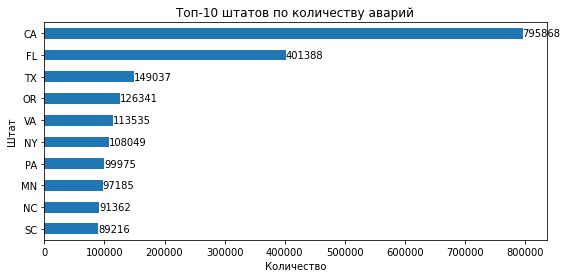

In [13]:
accidents_by_states = us_accidents.State.value_counts().nlargest(10).sort_values()

# Строим визаулизацию
fig, ax = plt.subplots(figsize=(9,4))
accidents_by_states.plot.barh(rot=0)
ax.set(title='Топ-10 штатов по количеству аварий',
       xlabel='Количество',
       ylabel='Штат')

ax.bar_label(ax.containers[0])
plt.show()

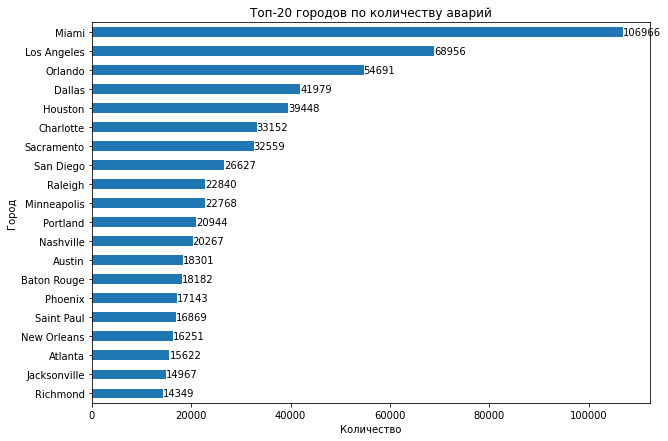

In [14]:
accidents_by_cities = us_accidents.City.value_counts().nlargest(20).sort_values()

# Строим визаулизацию
fig, ax = plt.subplots(figsize=(10,7))
accidents_by_cities.plot.barh()
ax.set(title='Топ-20 городов по количеству аварий',
       xlabel='Количество',
       ylabel='Город')

ax.bar_label(ax.containers[0])
plt.show()

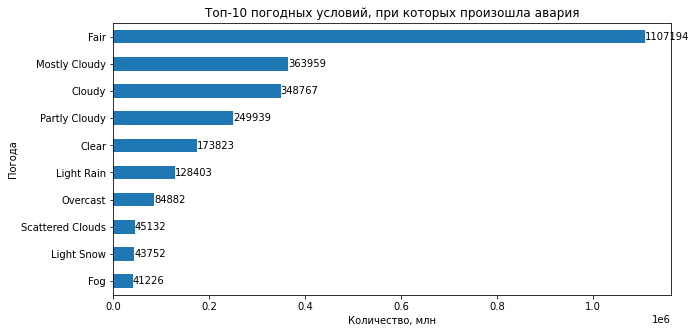

In [15]:
weather_conditions = us_accidents.Weather_Condition.value_counts().nlargest(10).sort_values()

plt.figure(figsize=(10,5))
ax = weather_conditions.plot.barh()
ax.set(title='Топ-10 погодных условий, при которых произошла авария',
       xlabel='Количество, млн',
       ylabel='Погода')

ax.bar_label(ax.containers[0], labels=weather_conditions)
plt.show()

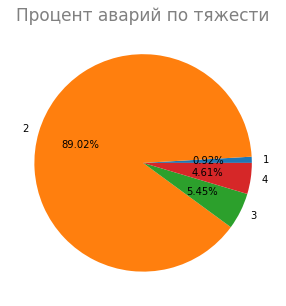

In [16]:
accident_severity = us_accidents.groupby('Severity').ID.count()

fix = plt.subplots(figsize=(5,5))
plt.pie(accident_severity, labels=accident_severity.index, autopct='%.2f%%')
plt.title('Процент аварий по тяжести',size=17,color="grey")
plt.show()

Сколько времени потребовалось, чтобы разобраться с последствиями проиcшествий.

In [17]:
us_accidents['timedelta'] = (us_accidents.End_Time - us_accidents.Start_Time) / pd.Timedelta('1 minute')
timedeltaQ1 = round(us_accidents.timedelta.quantile(0.25))
timedeltaQ2 = round(us_accidents.timedelta.quantile(0.5))
timedeltaQ3 = round(us_accidents.timedelta.quantile(0.75))

In [18]:
def time_of_accidents(time):
    if time < timedeltaQ1:
        return 'Менее {} минут'.format(timedeltaQ1)
    elif timedeltaQ1 <= time <= timedeltaQ2:
        return 'От {} до {} минут'.format(timedeltaQ1, timedeltaQ2)
    else:
        return 'Более {} минут'.format(timedeltaQ2)

us_accidents['cleanup_time'] = us_accidents.timedelta.apply(time_of_accidents)

In [19]:
us_accidents.groupby('cleanup_time').ID.count()

cleanup_time
Более 120 минут       1413711
Менее 74 минут         711436
От 74 до 120 минут     720195
Name: ID, dtype: int64

In [20]:
pivot = us_accidents.pivot_table(
    index='Severity',
    values='timedelta',
    aggfunc=['mean', 'median']
)
pivot

,mean,median
,timedelta,timedelta
Severity,,
1,60.724059,34.966667
2,336.931437,120.066667
3,210.738737,49.816667
4,1020.330684,179.266667


Посмотрим на распределение аравий в зависимости от времени дня.

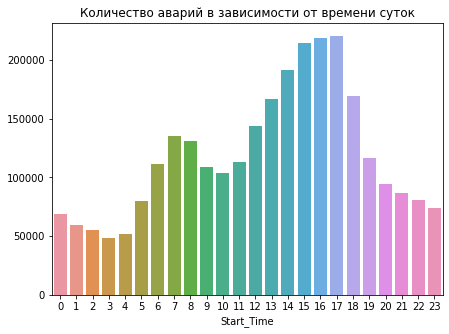

In [30]:
pivot = us_accidents.pivot_table(
    columns=us_accidents.Start_Time.dt.hour,
    values='ID',
    aggfunc='count'
)
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(pivot)
plt.title('Количество аварий в зависимоcти от времени суток')
plt.show()

Первый пик наблюдается с 7 до 8 часов, что соответсвует времени, когда люди выходят из дома на работу/в университет. Наибольшее число аварий случается с 15 до 17 часов, что соответсвует концу рабочего дня.

Теперь посмотрим, влияет ли день недели на распределние автомобильных проишествий в течение дня. 

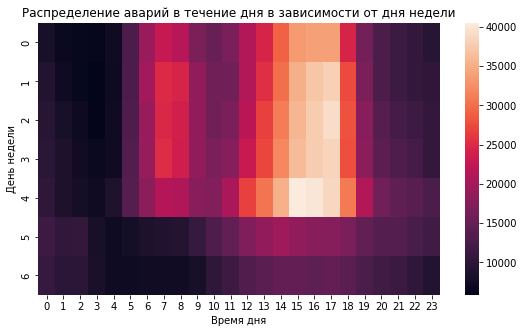

In [22]:
pivot = us_accidents.pivot_table(
    columns=us_accidents.Start_Time.dt.hour,
    index=us_accidents.Start_Time.dt.dayofweek,
    values='ID',
    aggfunc='count'
)
f, ax = plt.subplots(figsize=(9, 5))
ax = sns.heatmap(pivot)
plt.xlabel('Время дня')
plt.ylabel('День недели')
plt.title('Распределение аварий в течение дня в зависимости от дня недели')
plt.show()

Что ожидаемо с понедельника по пятницу тенденция поддерживается. Исходя из тепловой таблицы, можно сказать, что в пятницу количество ДТП больше по сравнению с другими будними днями (посмотрим на это дальше в процентном соотношении).

В выходные же дни концентрация происшествий в утренние часы (с 6 до 12) сначительно снижена. После 12 и вплоть до 18 часов дня количество аварий начинает увеличиваться, но не так заметно, как в будние дни.

In [23]:
accidents_per_dayofweek = us_accidents.pivot_table(
    index=us_accidents.Start_Time.dt.dayofweek,
    values='ID',
    aggfunc='count'
)
accidents_per_dayofweek['pct_total'] = round((accidents_per_dayofweek.ID / len(us_accidents)) * 100, 2)
avg = accidents_per_dayofweek.query('Start_Time <=3').pct_total.mean()

display(accidents_per_dayofweek)

,ID,pct_total
Start_Time,,
0,419821,14.75
1,443968,15.60
2,455037,15.99
3,463477,16.29
4,492074,17.29
5,311691,10.95
6,259274,9.11


Процентные показатели подтверждают, что в пятницу количество ДТП больше, по сравнению с другими будними днями. 

Далее посмотрим распределение варий по месяцам и годам:

In [24]:
pivot = us_accidents.pivot_table(
    columns=us_accidents.Start_Time.dt.year,
    index=us_accidents.Start_Time.dt.month,
    values='ID',
    aggfunc='count'
)
pivot['Total'] = pivot.sum(axis=1)
pivot

Start_Time,2016,2017,2018,2019,2020,2021,Total
Start_Time,,,,,,,
1,7,15880,14659,17280,38681,111858,198365
2,546,15279,12685,17597,34437,114451,194995
3,2398,16631,12416,14536,46604,65639,158224
4,5904,13545,10920,14763,55849,70899,171880
5,7148,15216,10922,14864,55504,78290,181944
6,9624,13867,10355,12942,62271,117502,226561
7,13903,13063,10692,13922,186,107345,159111
8,16737,13293,12281,18161,488,117710,178670
9,14269,11149,14338,33541,36050,132475,241822
